# Archivo para comparar varios modelos

In [1]:
import dataAcquisition
import ReparameterizationTrick
import Encoder
import Decoder
import VAE
import loss
import train
import Predictor
import importlib
import numpy as np
import tensorflow as tf
tf.config.run_functions_eagerly(False)


In [2]:
importlib.reload(dataAcquisition)

x_train, x_val, y_train, y_val, average_image, x_train_mix, x_test_mix,x_train_1, y_train_1 =  dataAcquisition.data_acquisition()

x_train(60k).shape:       (60000, 28, 28)
x_train_C.shape:     (55000, 28, 28, 1)
x_val_C.shape:     (5000, 28, 28, 1)
x_test_C.shape:      (10000, 28, 28, 1)
x_train.shape:       (55000, 28, 28)
x_val.shape:       (5000, 28, 28)
x_test.shape:       (10000, 28, 28)
x_train_mix.shape:  (55000, 28, 28)
x_test_mix.shape:  (10000, 28, 28)


In [3]:
import VAE
importlib.reload(VAE)

espacio_latente = [2 ,64, 128, 256]
modelos = []
for laten in espacio_latente:
    modelos.append(VAE.definir_modelo(x_train, y_train, latent_dim = laten, show_model=False) )
        

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 784)       │          0 │ input_img[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 794)       │          0 │ flatten[0][0],    │
│ (Concatenate)       │                   │            │ encoder_conditio… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │    101,760 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 2)         │        258 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 2)         │        258 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sampling (Sampling) │ (None, 2)         │          0 │ z_mean[0][0],     │
│                     │                   │            │ z_log_var[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 102,276 (399.52 KB)

 Trainable params: 102,276 (399.52 KB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ z_sampling          │ (None, 2)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 12)        │          0 │ z_sampling[0][0], │
│ (Concatenate)       │                   │            │ decoder_conditio… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │      1,664 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 784)       │    101,136 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 28, 28, 1) │          0 │ dense_2[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 102,800 (401.56 KB)

 Trainable params: 102,800 (401.56 KB)

 Non-trainable params: 0 (0.00 B)

Model: "vae"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder             │ [(None, 2),       │    102,276 │ input_img[0][0],  │
│ (Functional)        │ (None, 2), (None, │            │ encoder_conditio… │
│                     │ 2)]               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder             │ (None, 28, 28, 1) │    102,800 │ encoder[0][2],    │
│ (Functional)        │                   │            │ decoder_conditio… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 205,076 (801.08 KB)

 Trainable params: 205,076 (801.08 KB)

 Non-trainable params: 0 (0.00 B)

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 784)       │          0 │ input_img[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 794)       │          0 │ flatten_1[0][0],  │
│ (Concatenate)       │                   │            │ encoder_conditio… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 128)       │    101,760 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 64)        │      8,256 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 64)        │      8,256 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sampling_1          │ (None, 64)        │          0 │ z_mean[0][0],     │
│ (Sampling)          │                   │            │ z_log_var[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 118,272 (462.00 KB)

 Trainable params: 118,272 (462.00 KB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ z_sampling          │ (None, 64)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 74)        │          0 │ z_sampling[0][0], │
│ (Concatenate)       │                   │            │ decoder_conditio… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 128)       │      9,600 │ concatenate_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 784)       │    101,136 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_1 (Reshape) │ (None, 28, 28, 1) │          0 │ dense_5[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 110,736 (432.56 KB)

 Trainable params: 110,736 (432.56 KB)

 Non-trainable params: 0 (0.00 B)

Model: "vae"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder             │ [(None, 64),      │    118,272 │ input_img[0][0],  │
│ (Functional)        │ (None, 64),       │            │ encoder_conditio… │
│                     │ (None, 64)]       │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder             │ (None, 28, 28, 1) │    110,736 │ encoder[0][2],    │
│ (Functional)        │                   │            │ decoder_conditio… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 229,008 (894.56 KB)

 Trainable params: 229,008 (894.56 KB)

 Non-trainable params: 0 (0.00 B)

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 784)       │          0 │ input_img[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 794)       │          0 │ flatten_2[0][0],  │
│ (Concatenate)       │                   │            │ encoder_conditio… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 128)       │    101,760 │ concatenate_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 128)       │     16,512 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 128)       │     16,512 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sampling_2          │ (None, 128)       │          0 │ z_mean[0][0],     │
│ (Sampling)          │                   │            │ z_log_var[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 134,784 (526.50 KB)

 Trainable params: 134,784 (526.50 KB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ z_sampling          │ (None, 128)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_5       │ (None, 138)       │          0 │ z_sampling[0][0], │
│ (Concatenate)       │                   │            │ decoder_conditio… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 128)       │     17,792 │ concatenate_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 784)       │    101,136 │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_2 (Reshape) │ (None, 28, 28, 1) │          0 │ dense_8[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 118,928 (464.56 KB)

 Trainable params: 118,928 (464.56 KB)

 Non-trainable params: 0 (0.00 B)

Model: "vae"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder             │ [(None, 128),     │    134,784 │ input_img[0][0],  │
│ (Functional)        │ (None, 128),      │            │ encoder_conditio… │
│                     │ (None, 128)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder             │ (None, 28, 28, 1) │    118,928 │ encoder[0][2],    │
│ (Functional)        │                   │            │ decoder_conditio… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 253,712 (991.06 KB)

 Trainable params: 253,712 (991.06 KB)

 Non-trainable params: 0 (0.00 B)

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 784)       │          0 │ input_img[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_6       │ (None, 794)       │          0 │ flatten_3[0][0],  │
│ (Concatenate)       │                   │            │ encoder_conditio… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 128)       │    101,760 │ concatenate_6[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 256)       │     33,024 │ dense_9[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 256)       │     33,024 │ dense_9[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sampling_3          │ (None, 256)       │          0 │ z_mean[0][0],     │
│ (Sampling)          │                   │            │ z_log_var[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 167,808 (655.50 KB)

 Trainable params: 167,808 (655.50 KB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ z_sampling          │ (None, 256)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_7       │ (None, 266)       │          0 │ z_sampling[0][0], │
│ (Concatenate)       │                   │            │ decoder_conditio… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 128)       │     34,176 │ concatenate_7[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 784)       │    101,136 │ dense_10[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_3 (Reshape) │ (None, 28, 28, 1) │          0 │ dense_11[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 135,312 (528.56 KB)

 Trainable params: 135,312 (528.56 KB)

 Non-trainable params: 0 (0.00 B)

Model: "vae"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder             │ [(None, 256),     │    167,808 │ input_img[0][0],  │
│ (Functional)        │ (None, 256),      │            │ encoder_conditio… │
│                     │ (None, 256)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder             │ (None, 28, 28, 1) │    135,312 │ encoder[0][2],    │
│ (Functional)        │                   │            │ decoder_conditio… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 303,120 (1.16 MB)

 Trainable params: 303,120 (1.16 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
print( modelos)

[<Functional name=vae, built=True>, <Functional name=vae, built=True>, <Functional name=vae, built=True>, <Functional name=vae, built=True>]


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 637ms/step


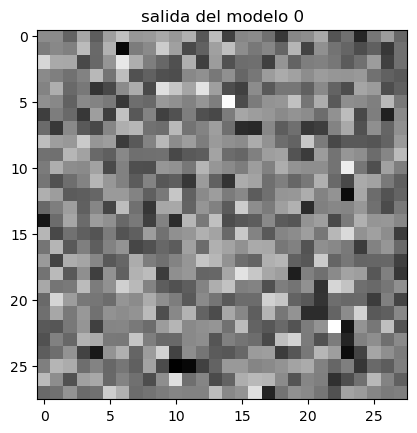

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


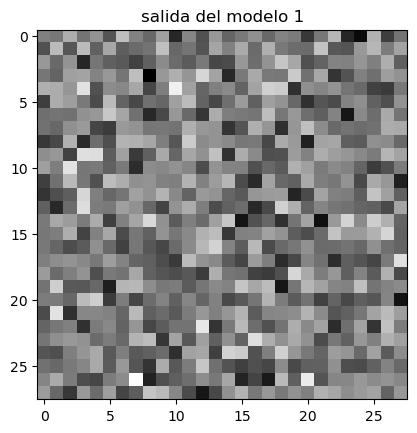

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


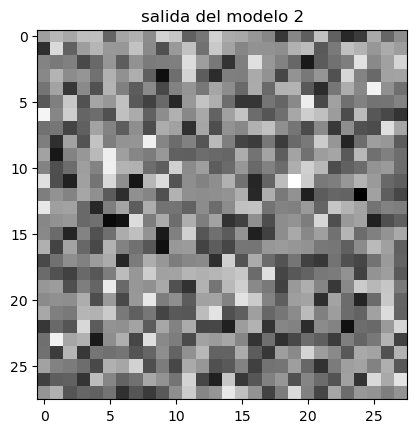

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


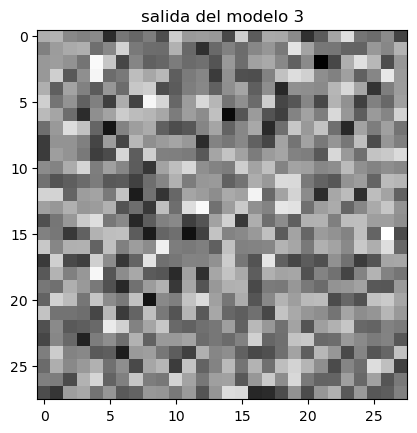

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
importlib.reload(loss)
# Optimizer ------------------------------------------------------------------
i=0
# Compile --------------------------------------------------------------------
for vae in modelos: 
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

    vae.compile(optimizer, loss=loss.vae_loss) #cambiar nombre

    img = np.expand_dims(x_train[0], axis=0)
    cond = np.expand_dims(y_train[0], axis=0)
    salida = vae.predict([img, cond,cond])

    reconstruccion = salida[0].reshape(28, 28)
    plt.imshow(reconstruccion, cmap='gray')
    plt.title(f"salida del modelo {i}")
    plt.show()
    i += 1

MODELO NÚMERO: 0
430/430 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - loss: 69.6052 - val_loss: 39.8870
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


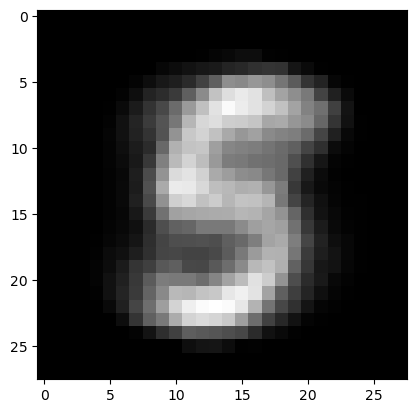

430/430 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - loss: 39.4049 - val_loss: 35.9844
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


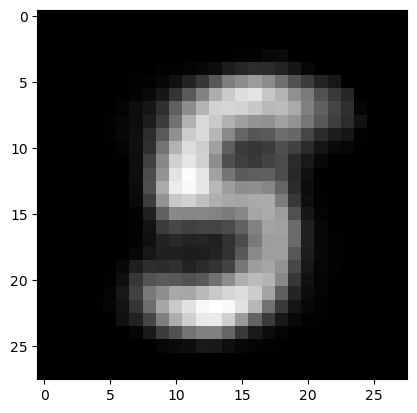

430/430 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - loss: 36.0766 - val_loss: 34.0363
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


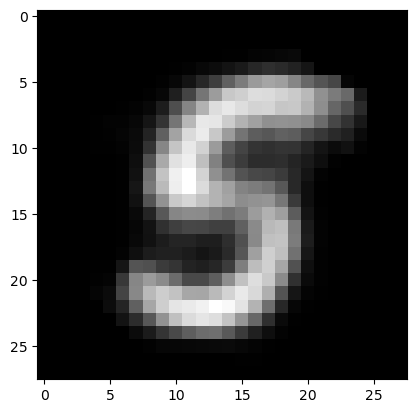

430/430 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 34.2940 - val_loss: 32.9789
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


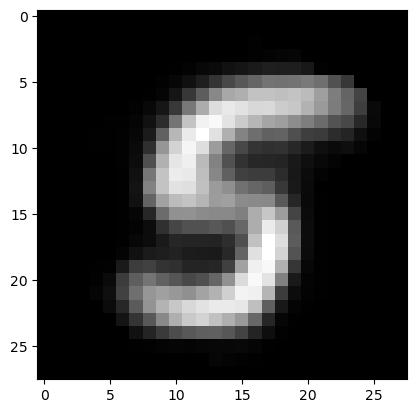

430/430 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - loss: 33.3976 - val_loss: 32.2035
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


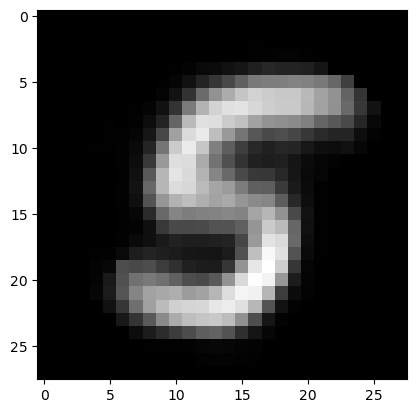

430/430 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 32.7168 - val_loss: 31.5469
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


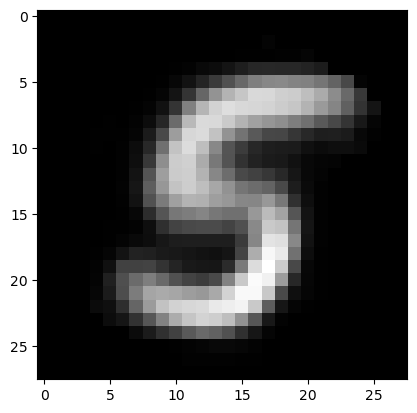

430/430 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 32.1383 - val_loss: 30.9788
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


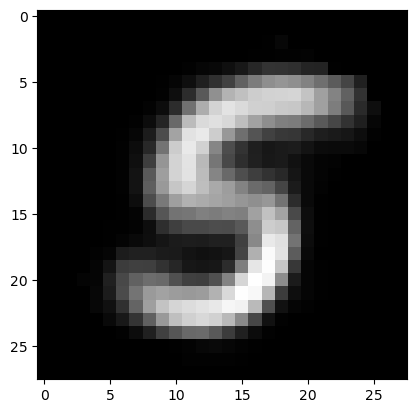

430/430 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 31.6949 - val_loss: 30.6086
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


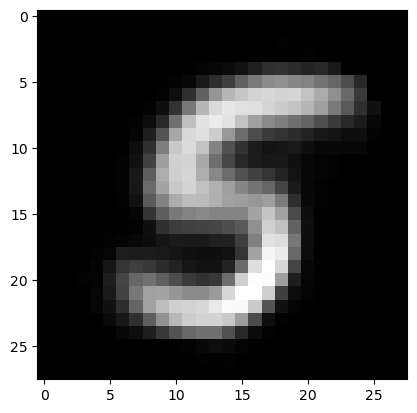

430/430 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 31.1598 - val_loss: 30.2294
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


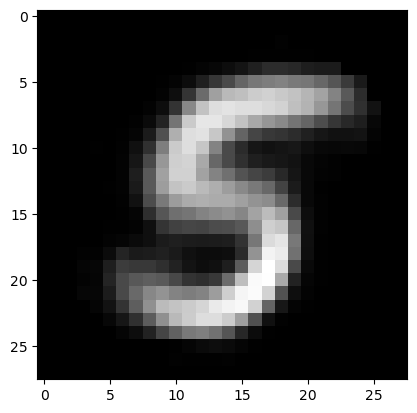

430/430 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 30.8333 - val_loss: 29.9793
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


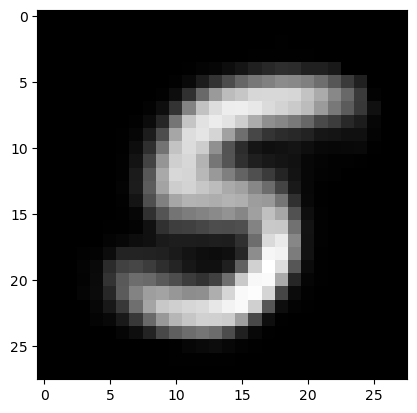

MODELO NÚMERO: 0
430/430 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - loss: 55.1920 - val_loss: 16.5540
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


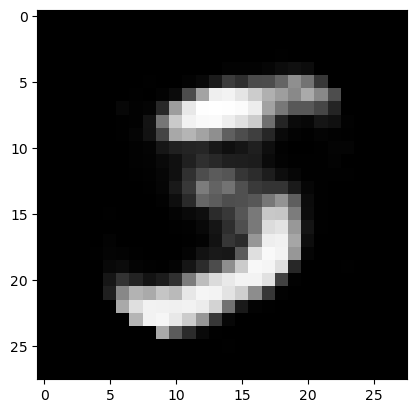

430/430 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 15.0506 - val_loss: 12.3959
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


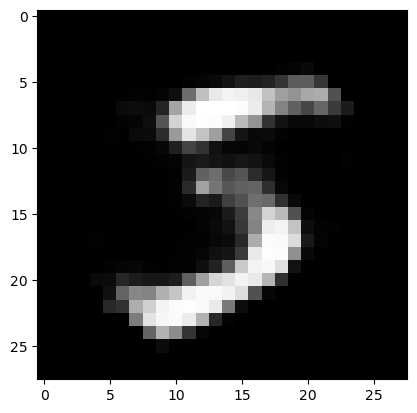

430/430 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 11.8839 - val_loss: 10.9212
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


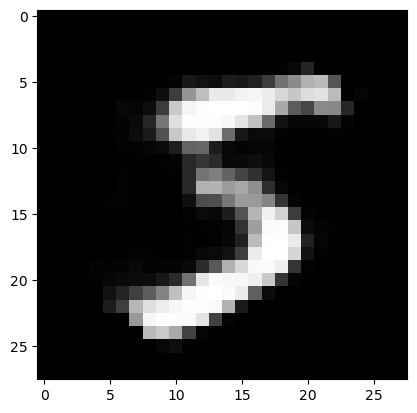

430/430 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 10.3903 - val_loss: 9.8686
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


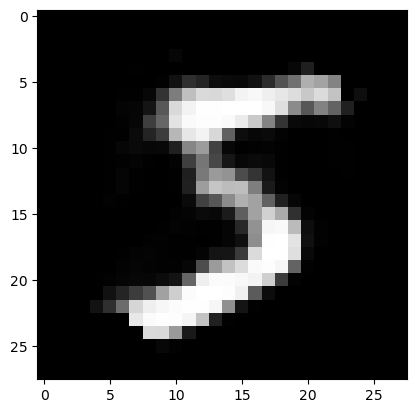

430/430 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - loss: 9.4380 - val_loss: 9.0231
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


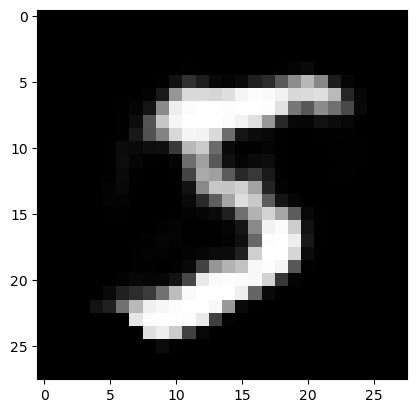

430/430 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 8.6358 - val_loss: 8.5884
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


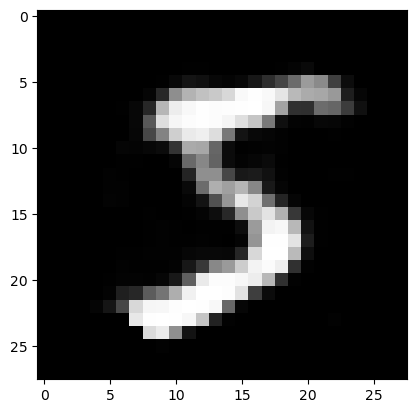

430/430 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 8.2439 - val_loss: 8.1230
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


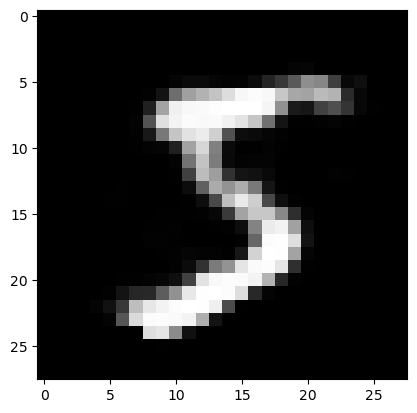

430/430 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - loss: 7.8430 - val_loss: 7.8967
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


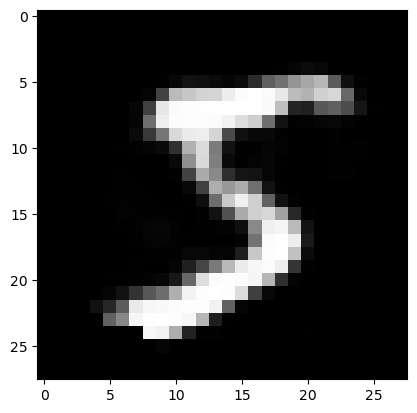

430/430 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - loss: 7.5509 - val_loss: 7.6315
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


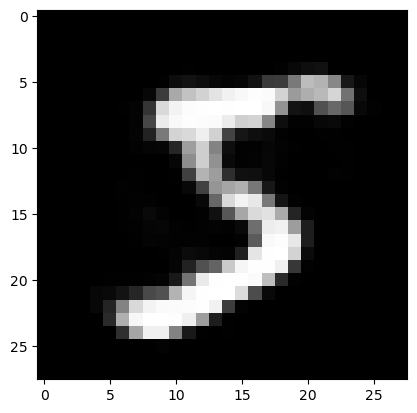

430/430 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - loss: 7.3138 - val_loss: 7.2920
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


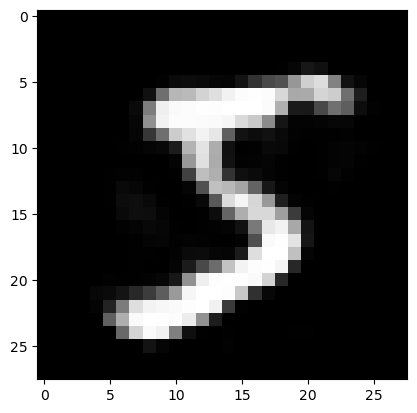

MODELO NÚMERO: 0
430/430 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - loss: 53.8978 - val_loss: 15.5564
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


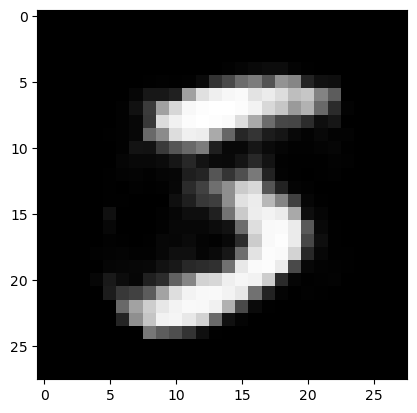

430/430 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - loss: 13.9721 - val_loss: 11.4635
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


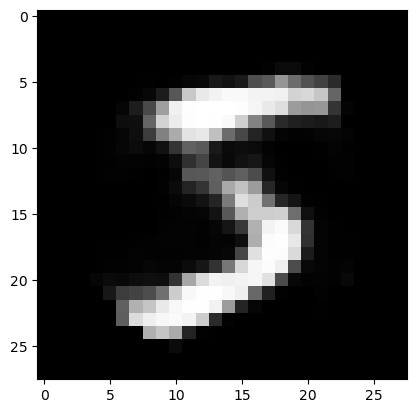

430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 10.7658 - val_loss: 9.9398
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


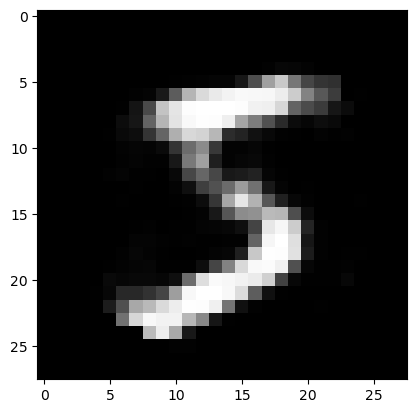

430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 9.5625 - val_loss: 8.8602
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


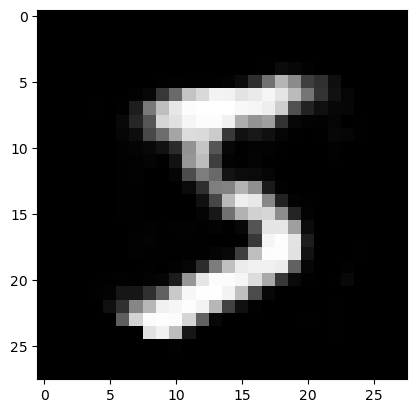

430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 8.6272 - val_loss: 8.2561
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


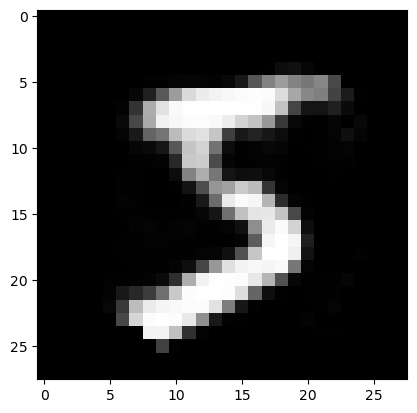

430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 8.0130 - val_loss: 7.8387
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


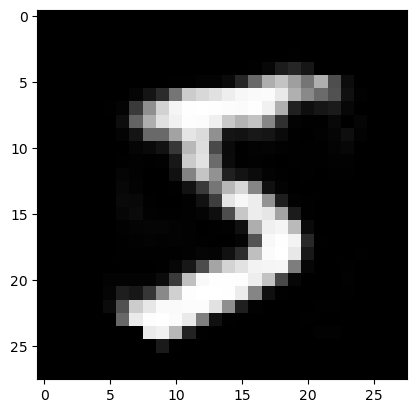

430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 7.4651 - val_loss: 7.5129
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


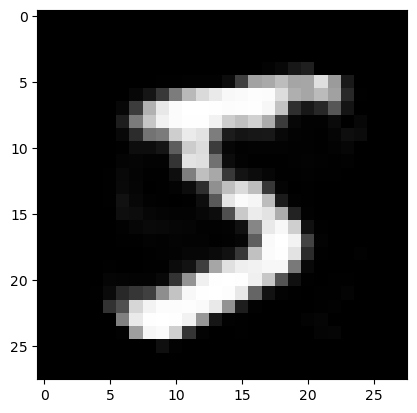

430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 7.2407 - val_loss: 7.2143
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


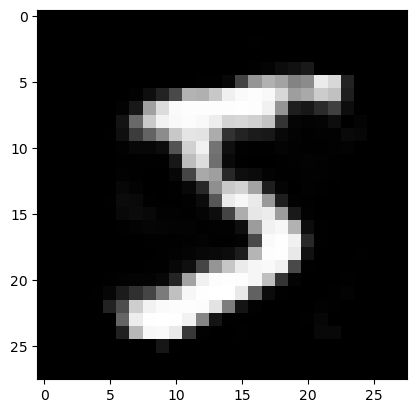

430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 6.9085 - val_loss: 6.9632
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


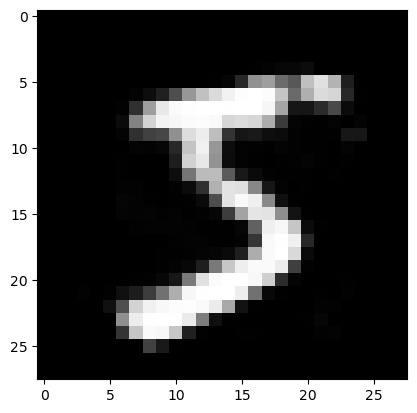

430/430 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 6.7516 - val_loss: 6.6243
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


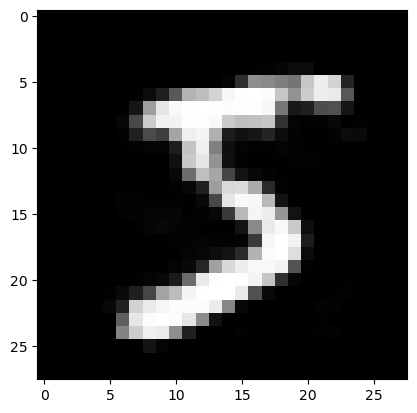

MODELO NÚMERO: 0
430/430 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 52.0626 - val_loss: 14.2015
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


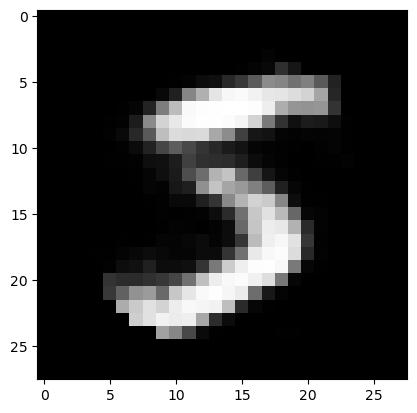

430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 12.8691 - val_loss: 10.5486
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


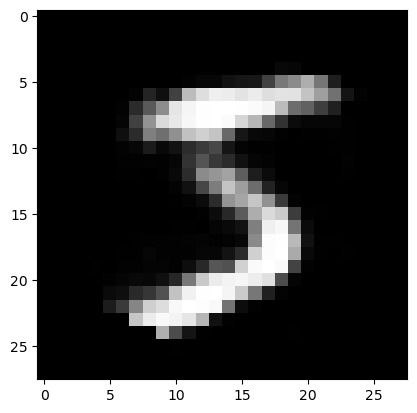

430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 9.9781 - val_loss: 9.2163
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


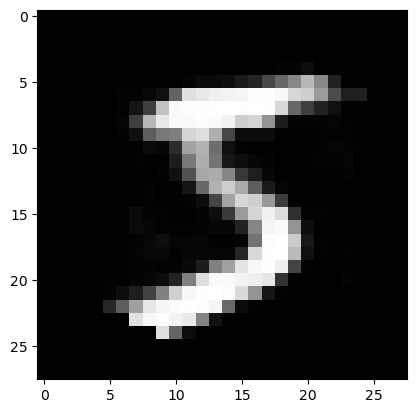

430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 8.7190 - val_loss: 8.4109
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


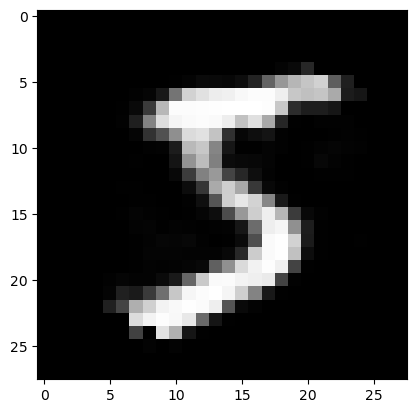

430/430 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 7.9953 - val_loss: 7.7470
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


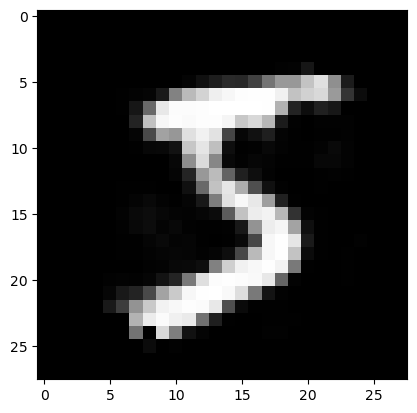

430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 7.5073 - val_loss: 7.2849
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


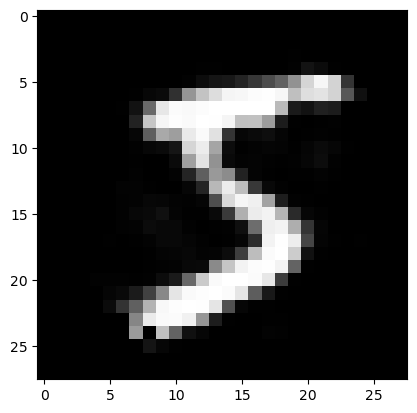

430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 7.0551 - val_loss: 7.0001
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


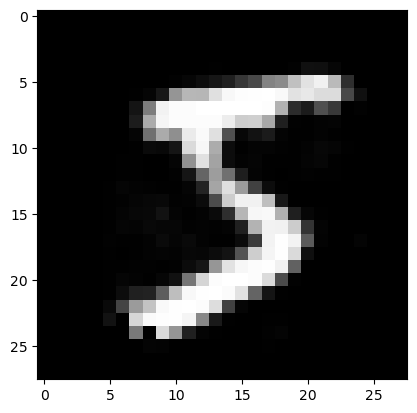

430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 6.6506 - val_loss: 6.6879
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


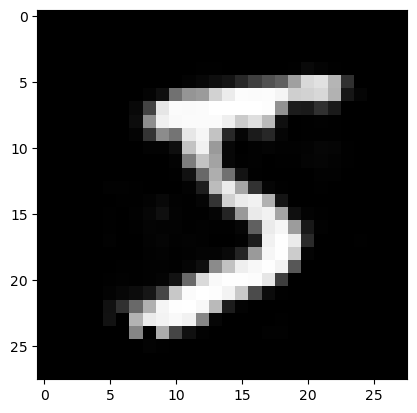

430/430 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 6.3779 - val_loss: 6.4504
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


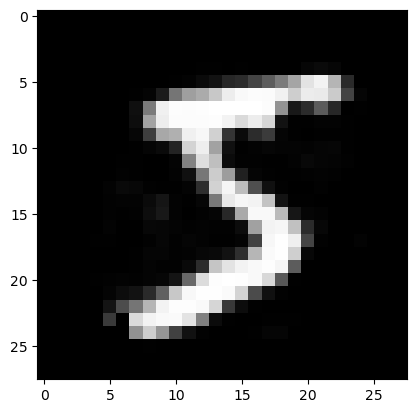

430/430 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 6.2289 - val_loss: 6.3471
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


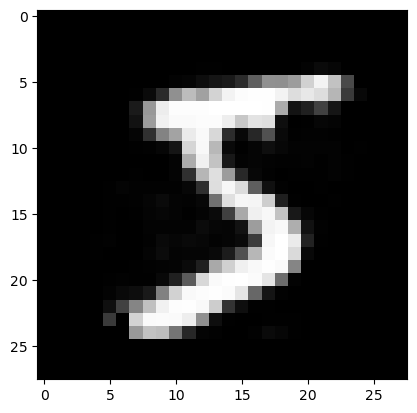

##############################################################


In [6]:
for vae in modelos:
    print(f"MODELO NÚMERO: 0")
    for i in range(10):
        train.train(vae, x_train, y_train, x_val, y_val)
        salida = vae.predict([img, cond, cond])
        reconstruccion = salida[0].reshape(28, 28)
        plt.imshow(reconstruccion, cmap='gray')
        plt.show()

print("##############################################################")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


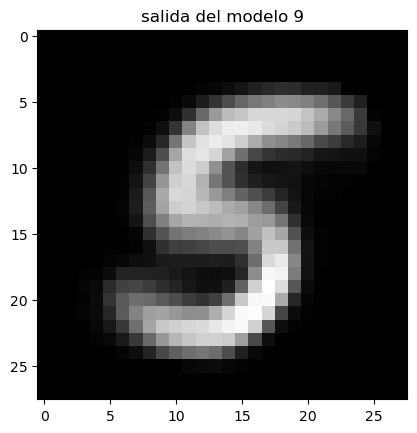

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


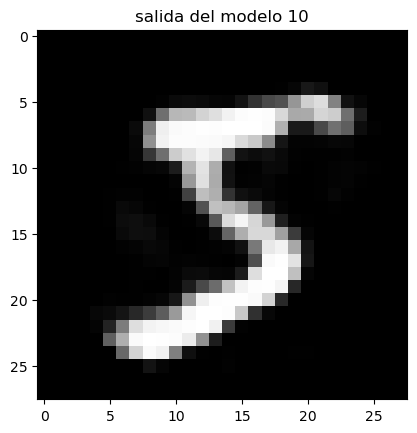

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


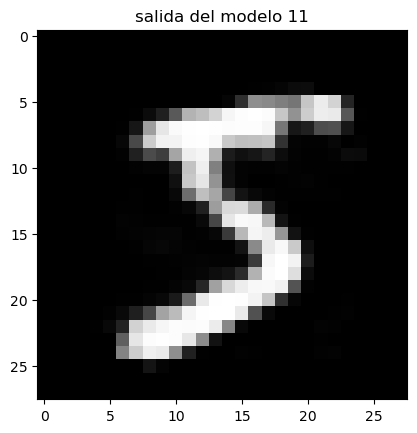

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


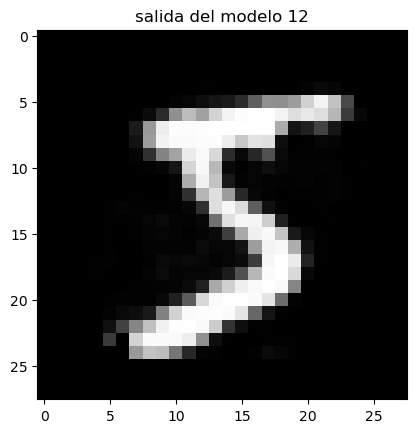

In [7]:
for vae in modelos: 
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

    #vae.compile(optimizer, loss=loss.vae_loss) #cambiar nombre

    img = np.expand_dims(x_train[0], axis=0)
    cond = np.expand_dims(y_train[0], axis=0)
    salida = vae.predict([img, cond,cond])

    reconstruccion = salida[0].reshape(28, 28)
    plt.imshow(reconstruccion, cmap='gray')
    plt.title(f"salida del modelo {i}")
    plt.show()
    i += 1

Model: "predictor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ original_input (InputLayer)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_layer (ReshapeLayer)    │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 14, 14, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │        31,370 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,186 (196.04 KB)

 Trainable params: 50,186 (196.04 KB)

 Non-trainable params: 0 (0.00 B)

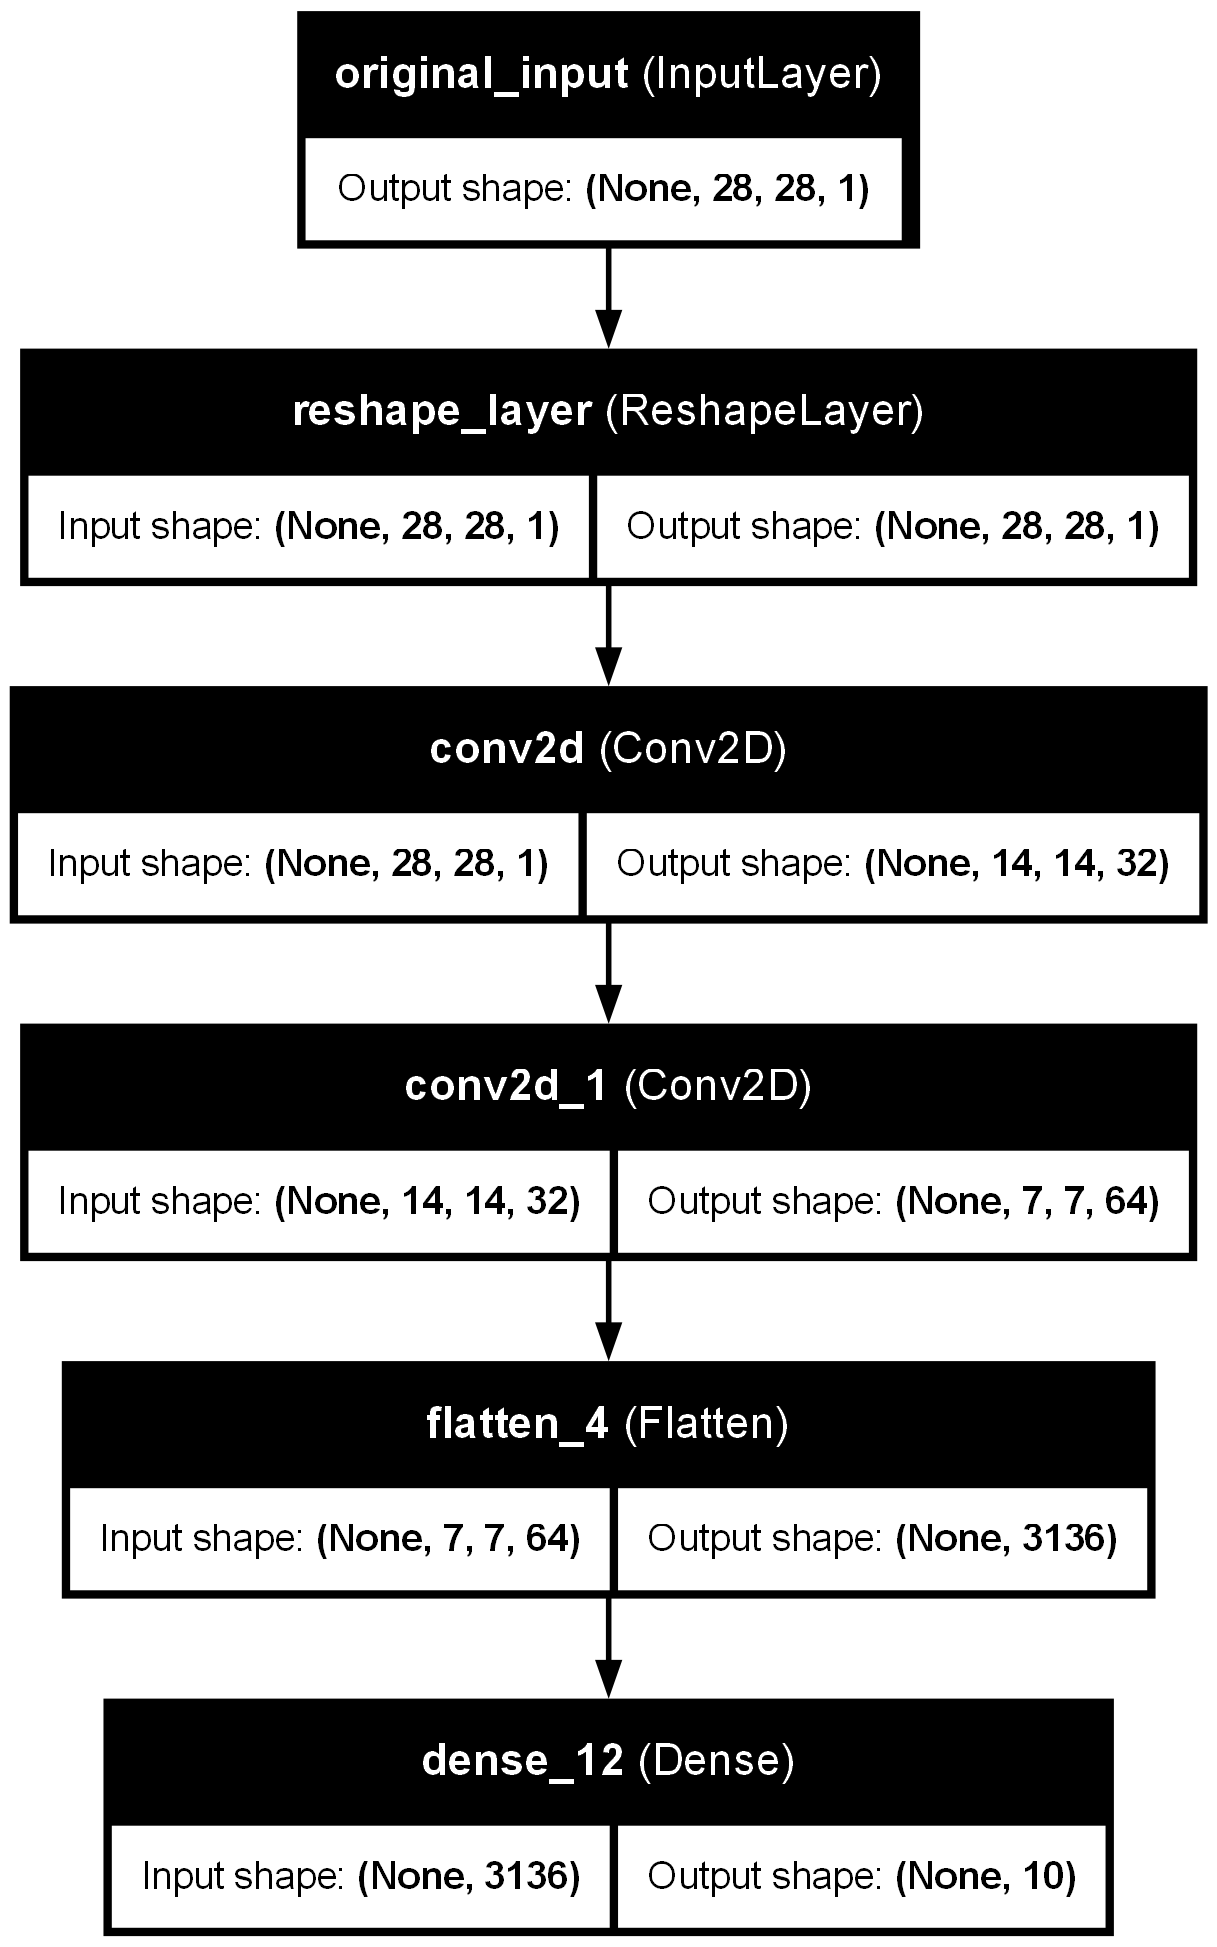

(1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


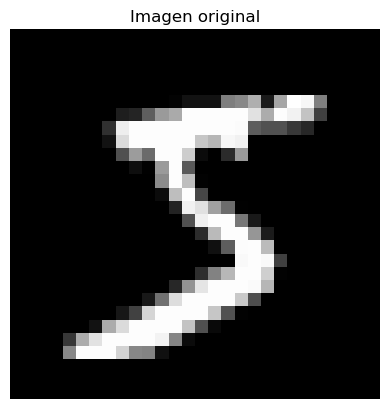

prediccion  5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
430/430 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - loss: 0.7077 - val_loss: 0.1145
prediccion  5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
430/430 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - loss: 0.1169 - val_loss: 0.0752
prediccion  5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
430/430 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - loss: 0.0752 - val_loss: 0.0590
prediccion  5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
430/430 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - loss: 0.0576 - val_loss: 0.0594
prediccion  5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
430/430 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.0458 - val_loss: 0.0565


In [8]:
predictor_c = Predictor.predictor()
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
predictor_c.compile(optimizer, loss="categorical_crossentropy")
print(img.shape)
prediccion = np.argmax( predictor_c.predict(img))
img[0].reshape(28, 28)
plt.imshow(img[0], cmap='gray')
plt.title("Imagen original")
plt.axis('off')
plt.show()

for i in range(5): 
    #reconstruccion = prediccion[0].reshape(28, 28)
    print(f"prediccion  {prediccion}")
    prediccion = np.argmax(predictor_c.predict(img))


    predictor_c.fit(
        x=x_train,
        y=y_train,
        batch_size=128,
        epochs=1,
        validation_data=(x_val, y_val)  # Include validation data
        )

MODELO NÚMERO: 0


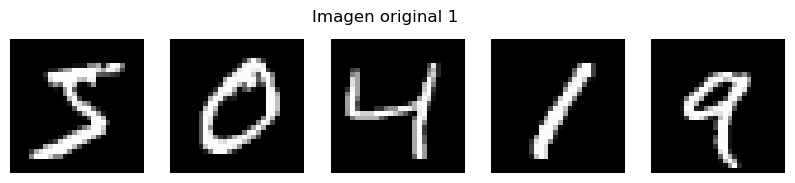

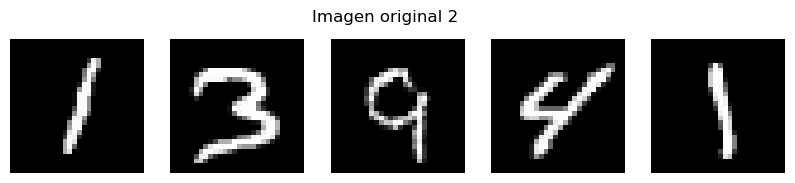

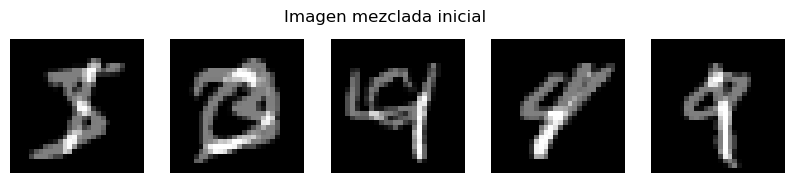

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
ITERACIÓN A: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
tf.Tensor(
[0.5115534  0.37611133 0.45703173 0.53886074 0.6815088  0.6271491
 0.22138408 0.7433329  0.26081514 0.36480516], shape=(10,), dtype=float32)
tf.Tensor(
[0.3630651  0.34626135 0.5777159  0.8122229  0.38352358 0.47254524
 0.39418626 0.65906096 0.3790214  0.4096484 ], shape=(10,), dtype=float32)
tf.Tensor(
[0.43730927 0.36118633 0.5173738  0.6755418  0.5325162  0.5498472
 0.30778515 0.7011969  0.31991827 0.38722676], shape=(10,), dtype=float32)
tf.Tensor(
[0.51785845 0.3877912  0.4765279  0.3300363  0.64899784 0.6164973
 0.25271723 0.2510262  0.4770516  0.42452192], shape=(10,), dtype=float32)
tf.Tensor(
[0.3820194  0.5061009  0.666462   0.4914981  0.37020043 0.48911595
 0.46777457 0.21967015 0.79723

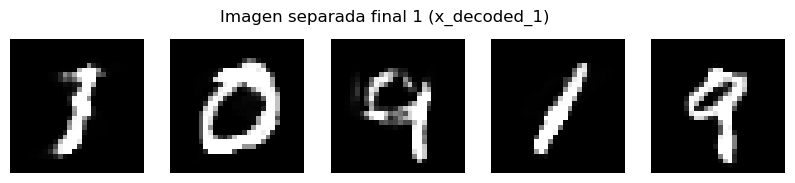

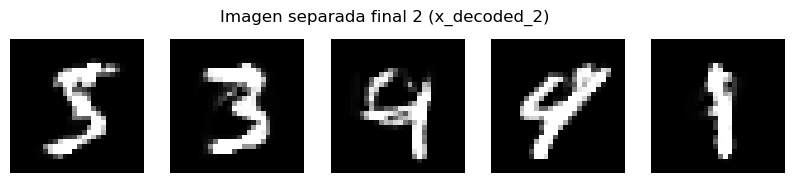

MODELO NÚMERO: 0


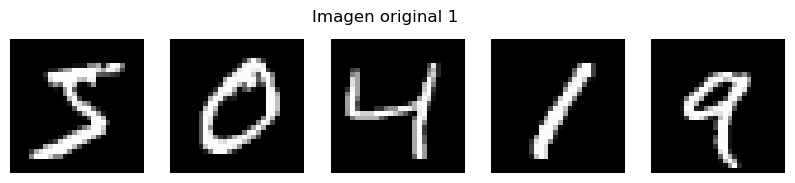

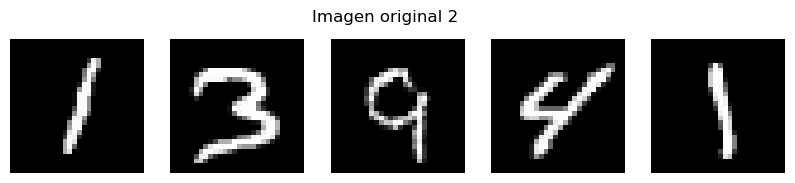

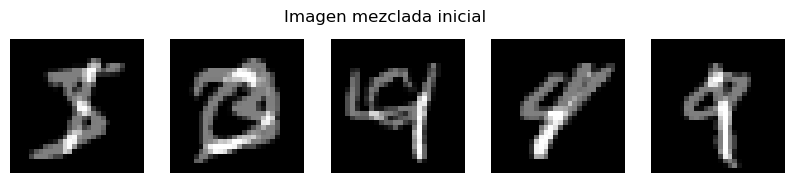

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
ITERACIÓN A: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
tf.Tensor(
[0.5824505  0.47657728 0.4983359  0.46330413 0.6013916  0.60320735
 0.29497787 0.58752346 0.33904552 0.50545645], shape=(10,), dtype=float32)
tf.Tensor(
[0.4427186  0.29032305 0.53952867 0.35848755 0.44107333 0.62214166
 0.46309313 0.43780208 0.5474756  0.34917477], shape=(10,), dtype=float32)
tf.Tensor(
[0.51258457 0.38345015 0.5189323  0.41089582 0.5212325  0.6126745
 0.3790355  0.51266277 0.44326055 0.4273156 ], shape=(10,), dtype=float32)
tf.Tensor(
[0.410235   0.31986466 0.4498777  0.4973121  0.59393406 0.5942091
 0.18057112 0.2952335  0.39009133 0.33364162], shape=(10,), dtype=float32)
tf.Tensor(
[0.39435598 0.43953225 0.46142107 0.6066027  0.4251265  0.66292375
 0.44204655 0.3093007  0.58285

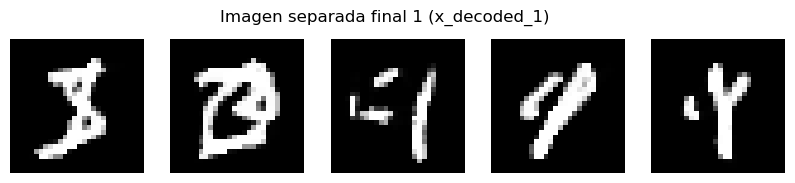

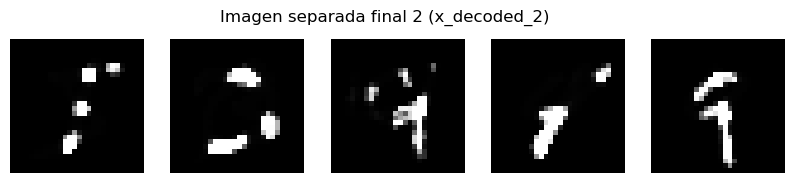

MODELO NÚMERO: 0


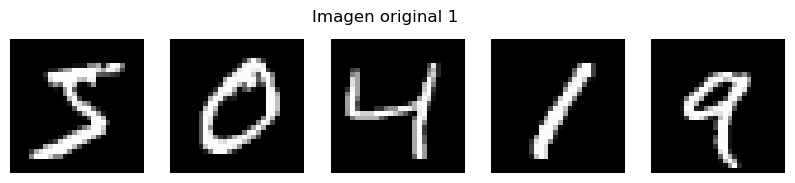

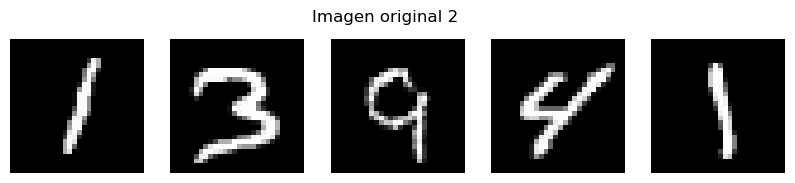

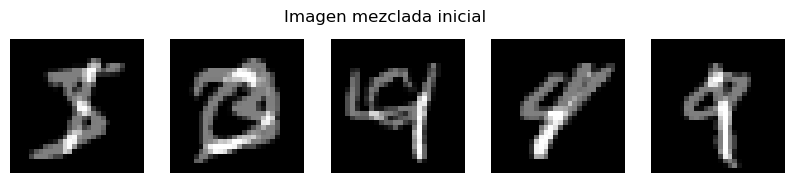

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
ITERACIÓN A: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
tf.Tensor(
[0.60070074 0.4547477  0.47039568 0.45903277 0.7006238  0.5950506
 0.2737722  0.63326025 0.31354162 0.5258882 ], shape=(10,), dtype=float32)
tf.Tensor(
[0.3968523  0.22500396 0.45777234 0.38999495 0.5496276  0.62428117
 0.24321458 0.52100354 0.36727643 0.460847  ], shape=(10,), dtype=float32)
tf.Tensor(
[0.49877653 0.33987582 0.46408403 0.42451388 0.6251257  0.6096659
 0.2584934  0.57713187 0.34040904 0.4933676 ], shape=(10,), dtype=float32)
tf.Tensor(
[0.49131534 0.39881578 0.45601484 0.48237374 0.44092983 0.6206261
 0.3734742  0.22323701 0.51141584 0.28642482], shape=(10,), dtype=float32)
tf.Tensor(
[0.3808188  0.4750919  0.526512   0.6434379  0.4036318  0.67198855
 0.5563428  0.3195637  0.6770087

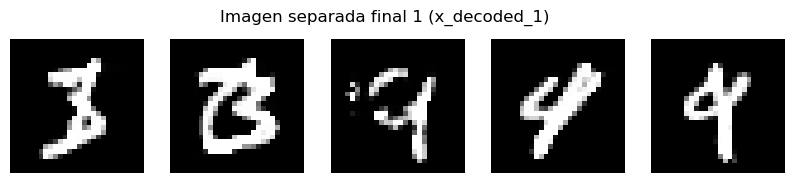

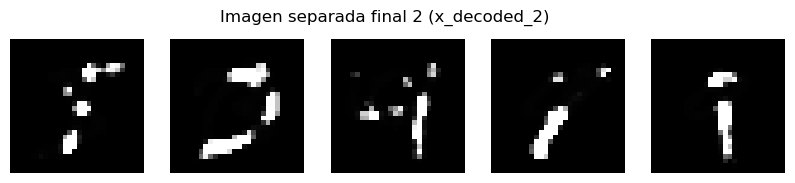

MODELO NÚMERO: 0


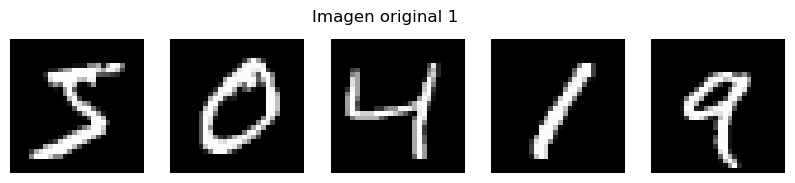

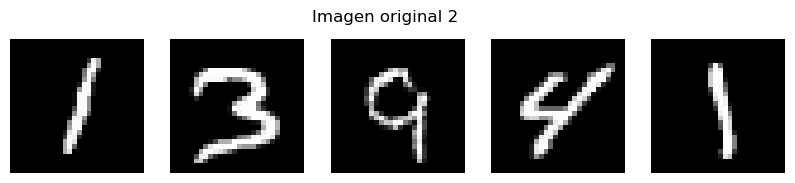

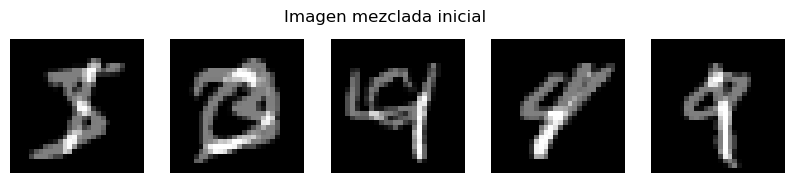

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
ITERACIÓN A: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
tf.Tensor(
[0.5959377  0.48217788 0.5032958  0.47881368 0.6634781  0.58566225
 0.23119834 0.6248846  0.35101995 0.5309403 ], shape=(10,), dtype=float32)
tf.Tensor(
[0.47599688 0.34222096 0.5177057  0.40397426 0.5002533  0.5867153
 0.21587466 0.4478543  0.4991983  0.36306304], shape=(10,), dtype=float32)
tf.Tensor(
[0.5359673  0.41219944 0.5105007  0.44139397 0.58186567 0.5861888
 0.22353649 0.53636944 0.42510912 0.44700167], shape=(10,), dtype=float32)
tf.Tensor(
[0.39266384 0.33614781 0.4514668  0.44356853 0.49118832 0.6580706
 0.45923364 0.29070446 0.39015272 0.32463646], shape=(10,), dtype=float32)
tf.Tensor(
[0.38972837 0.5088407  0.5169685  0.6056571  0.40574703 0.69587654
 0.611742   0.35525993 0.592768

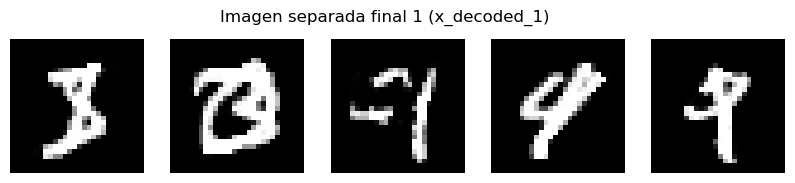

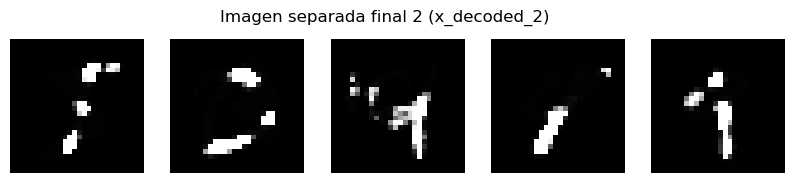

##############################################################
cambio de modelo


In [11]:
import inferencias
importlib.reload(inferencias)
# Suponiendo que ya tienes definidos:
# x_train, x_train_1, y_train, y_train_1, predictor, encoder, decoder
encoder=0
decoder=0
for vae in modelos:
    print(f"MODELO NÚMERO: 0")
                                #x_train, x_train_1, y_train, predictor, y_train_1,
    inferencias.inferncia_modelo(x_train[0:10], x_train_1[0:10], y_train[0:10], predictor_c,encoder,decoder ,y_train_1[0:10],vae)

print("##############################################################")
print("cambio de modelo")


